# Housing Prices Prediction

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
sns.__version__

'0.11.2'

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# %cd "/content/gdrive/My Drive/AdvancedAICourse/Spring2022StudentFolders/YournameSurnameAdvancedAI/"
%cd "/content/gdrive/My Drive/AdvancedAICourse/CourseDocuments/"

/content/gdrive/My Drive/AdvancedAICourse/CourseDocuments


In [ ]:
df = pd.read_csv('kc_house_data.csv')

# EDA - Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
# sorting correlation values to see which ones are between %20 and %90
# from domain knowledge we know that year of renovation is importan
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

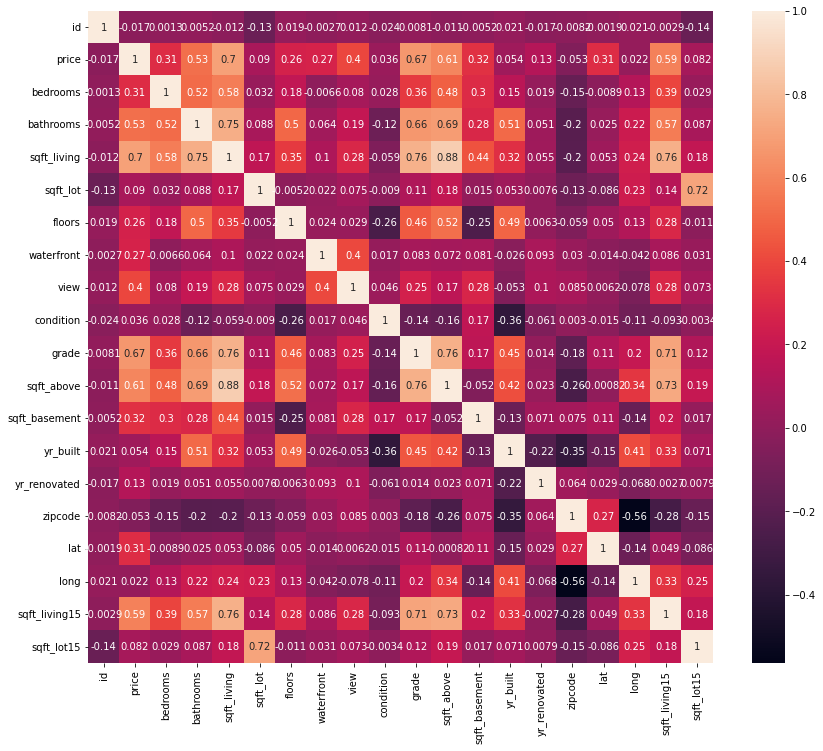

In [ ]:
ax=plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot = True)

# Data Visualization

(array([  1.,   1.,   1.,   2.,   3.,   2.,   1.,   7.,   1.,   0.,   5.,
          1.,   6.,   1.,   5.,   2.,  11.,   2.,   9.,   2.,   7.,  10.,
          7.,  16.,   6.,  14.,  19.,   5.,  11.,  40.,  20.,  24.,  44.,
         18.,  37.,  49.,  56.,  58.,  62.,  30.,  71.,  73., 140.,  99.,
        143., 124., 142., 150., 180., 166., 190., 359., 193., 228., 239.,
        242., 384., 213., 259., 382., 224., 369., 261., 454., 252., 370.,
        380., 373., 328., 296., 351., 341., 463., 348., 415., 391., 408.,
        449., 355., 355., 311., 495., 248., 283., 454., 331., 468., 369.,
        301., 363., 282., 323., 263., 349., 257., 253., 253., 295., 219.,
        228., 257., 207., 223., 196., 211., 152., 141., 155., 149., 117.,
        126., 118.,  48.,  88.,  60.,  74.,  42.,  62.,  39.,  76.,  51.,
         64.,  46.,  62.,  58.,  36.,  50.,  37.,  27.,  35.,  25.,  30.,
         39.,  27.,  41.,  18.,  21.,  24.,  19.,  23.,  21.,  20.,   5.,
          4.,  11.,  14.,  16.,  12., 

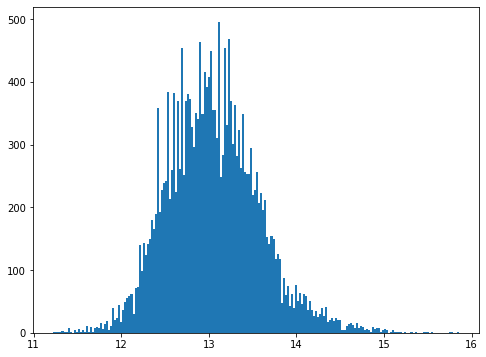

In [ ]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.price)), bins=200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


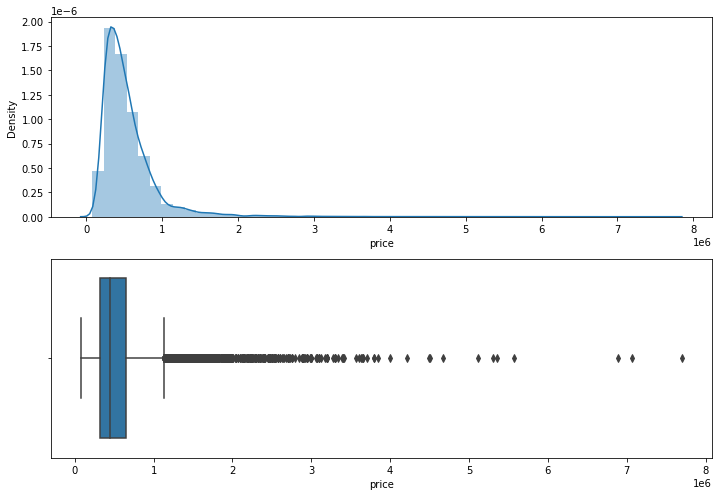

In [ ]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

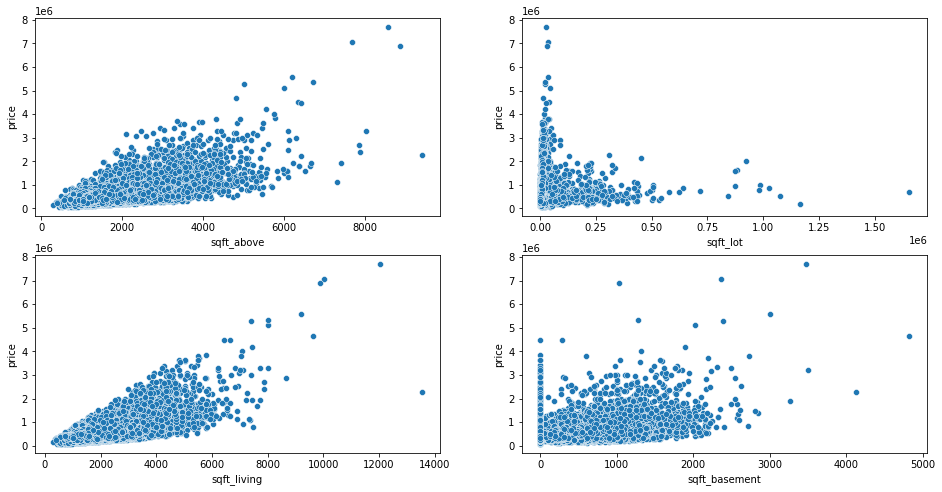

In [ ]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'],df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'],df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

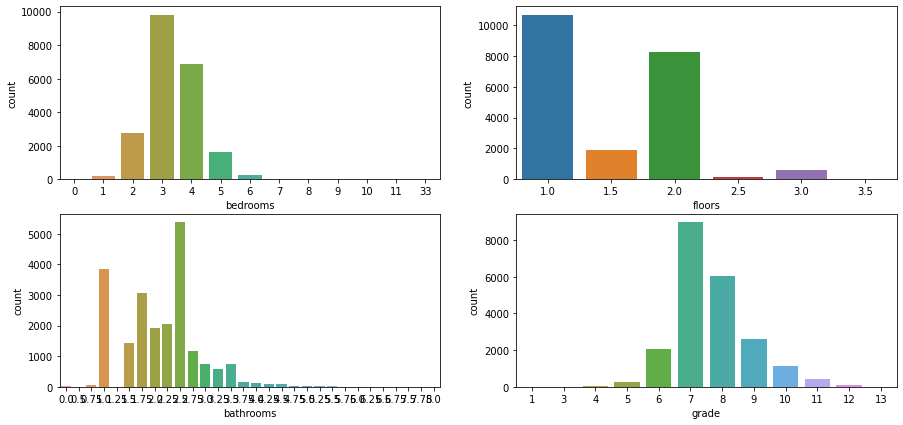

In [ ]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(df['grade'])

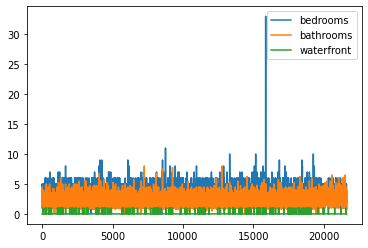

In [ ]:
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend()

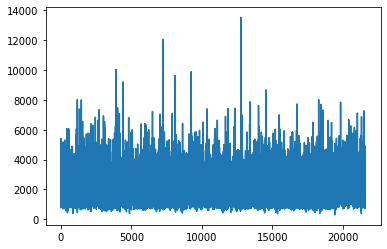

In [ ]:
df.sqft_living.plot()

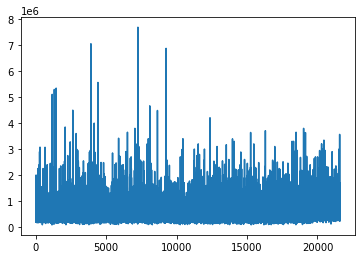

In [ ]:
df.price.plot()

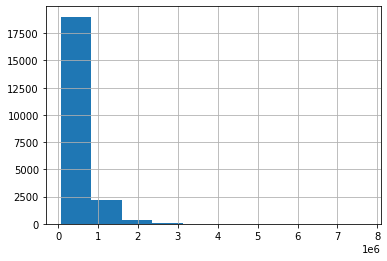

In [ ]:
df.price.hist()

In [ ]:
Q1= df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


# Feature Engineering

In [ ]:
# turning zipcode variable into category
df['zipcode'] = df['zipcode'].astype('category')

In [ ]:
df=df[df['bedrooms']<10]

In [ ]:
df=df[df['bathrooms']<7]

In [ ]:
df = df[df['bathrooms']<10]
df=df[df['bedrooms']<7]
df['bedrooms']=df['bedrooms']**2
df['bathrooms']=df['bathrooms']**2

In [ ]:
df['age']=2022-df['yr_built']

In [ ]:
df['basement']=np.where(df['sqft_basement']>0,1,0)
df['renovated']=np.where(df['yr_renovated']>0,1,0)

In [ ]:
df.quantile(.97).astype('int')

id               9477100562
price               1385000
bedrooms                 25
bathrooms                12
sqft_living            4120
sqft_lot              67499
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3690
sqft_basement          1330
yr_built               2013
yr_renovated           1989
lat                      47
long                   -121
sqft_living15          3560
sqft_lot15            51427
age                     112
basement                  1
renovated                 1
Name: 0.97, dtype: int64

In [ ]:
outliers = df.quantile(.97)
df = df[(df['price']<outliers['price'])]
df = df[(df['bedrooms']<outliers['bedrooms'])]
df = df[(df['sqft_living']<outliers['sqft_living'])]

In [ ]:
x, y = df[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'waterfront','zipcode', 'view','floors','renovated','condition','sqft_above']], df[['price']]

In [ ]:
x.shape

(19016, 11)

In [ ]:
y.shape

(19016, 1)

In [ ]:
x=pd.get_dummies(x, drop_first=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Values in x train", x_train)
print("Values in y train", y_train)

Values in x train        bedrooms  bathrooms  ...  zipcode_98198  zipcode_98199
15569         9     5.0625  ...              1              0
14290        16     7.5625  ...              0              0
5335          9     3.0625  ...              0              0
5896          9     6.2500  ...              0              0
11556         9     4.0000  ...              1              0
...         ...        ...  ...            ...            ...
12414        16     4.0000  ...              0              0
19581         9     2.2500  ...              0              0
5897          9     3.0625  ...              0              0
13780        16     3.0625  ...              1              0
265          16     6.2500  ...              0              0

[15212 rows x 79 columns]
Values in y train           price
15569  309950.0
14290  469950.0
5335   270000.0
5896   513000.0
11556  357000.0
...         ...
12414  575000.0
19581  340768.0
5897   360000.0
13780  293550.0
265    290000.0



In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15212, 79), (3804, 79), (15212, 1), (3804, 1))

In [ ]:
y_train

,price
15569,309950.0
14290,469950.0
5335,270000.0
5896,513000.0
11556,357000.0
...,...
12414,575000.0
19581,340768.0
5897,360000.0
13780,293550.0


# Model Preparation

In [ ]:
def algo_test(x,y):

        #I include the regression models I will use.
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
       # XGBC=XGBRegressor()
        dt=DecisionTreeRegressor()
        kn=KNeighborsRegressor()
        
        #I separate the data as train and test. (20% test)
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        #I put my models and model names in a list.
       # algos=[L,R,Lass,E,ETR,GBR,XGBC,dt,kn]
       # algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','XGradientBoosting','DecisionTree','KNeighbors']
        algos=[L,R,Lass,E,ETR,GBR,dt,kn]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Gradient Boosting','XGradientBoosting','DecisionTree','KNeighbors']
        
        #I create empty lists for error rates and success rates, which I will fill in later.
        r2Score = []
        rmse = []
        mae = []
        
        #I am creating a dataframe as I want to see all results as a table. 
        #Its columns will be 'R2_score', 'RMSE', 'MAE'. The indexes will take from the string I created for the model names.
        result=pd.DataFrame(columns=['R2_score','RMSE','MAE'],index=algo_names)
        
        #I run the regression algorithms for each model and find the results of r2_score, mean_absolute_error and mean_squared_error.
        #And I add these results I found to the empty lists I created above with the append () function.
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r2Score.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        #I fill the columns in the table with these lists.    
        result['R2_score']=r2Score 
        result.RMSE=rmse
        result.MAE=mae

        #I sort my result table by r2_score value and return it.
        return result.sort_values('R2_score',ascending=False)

In [ ]:
algo_test(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R2_score,RMSE,MAE
Linear,0.818459,94103.162755,67023.837949
Lasso,0.818405,94117.160730,67039.140590
Ridge,0.817311,94400.054758,67276.738699
XGradientBoosting,0.730201,114719.247550,86537.698780
DecisionTree,0.636260,133202.269594,90250.430389
Gradient Boosting,0.631480,134074.694601,90190.920837
ElasticNet,0.493124,157241.521073,121707.911743
KNeighbors,0.366325,175812.401450,131936.723817
